<div align="center">

# 2025
# Mineria de datos
# Orazi Roberto
## Trabajo practico 1

</div>

### Librerias

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA



In [295]:
data_cultivos='dxCrop_Soil.csv'
df_cultivos=pd.read_csv(data_cultivos)
df_cultivos.columns = df_cultivos.columns.str.strip()
df_cultivos = df_cultivos.drop('tipoCultivo', axis=1)
columnas_numericas = df_cultivos.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df_cultivos.select_dtypes(include=['object']).columns.tolist()
df_cultivos

,temperatura,humedad,aguaEnSuelo,tipoSuelo,nitrogeno,potasio,fosforo,nombreFertilizante
0,26.00,52.00,38.00,Arenoso,37,0,0,Urea
1,29.00,52.00,45.00,Franco,12,0,36,DAP
2,34.00,65.00,62.00,Negro,7,9,30,14-35-14
3,32.00,62.00,34.00,Rojo,22,0,20,28-28
4,28.00,54.00,46.00,Arcilloso,35,0,0,Urea
...,...,...,...,...,...,...,...,...
7995,35.30,59.61,44.25,Franco,10,14,10,Urea
7996,39.39,71.67,49.34,Negro,35,0,0,10-26-26
7997,35.79,67.64,45.04,Rojo,41,0,0,Urea
7998,37.78,73.38,36.03,Negro,10,3,30,DAP


### Analisis exploratorio de datos

In [296]:
print("\nTipos de datos:")
print(df_cultivos.dtypes)


Tipos de datos:
temperatura           float64
humedad               float64
aguaEnSuelo           float64
tipoSuelo              object
nitrogeno               int64
potasio                 int64
fosforo                 int64
nombreFertilizante     object
dtype: object


Valores nulos por columna:
temperatura           0
humedad               0
aguaEnSuelo           0
tipoSuelo             0
nitrogeno             0
potasio               0
fosforo               0
nombreFertilizante    0
dtype: int64


<Axes: title={'center': 'Heatmap de valores nulos'}>

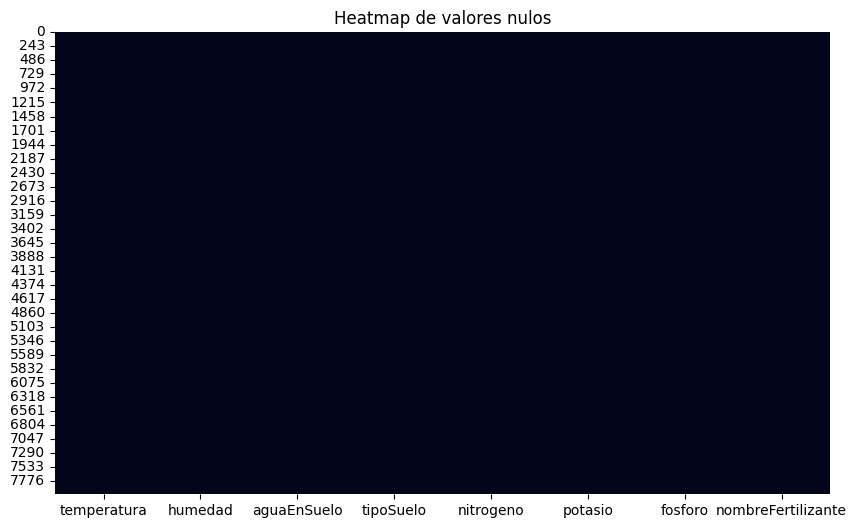

In [297]:
print("Valores nulos por columna:")
print(df_cultivos.isnull().sum())

plt.figure(figsize=(10, 6))
plt.title('Heatmap de valores nulos')
sns.heatmap(df_cultivos.isnull(), cbar=False)

In [298]:
duplicados = df_cultivos.duplicated().sum()
print(f"Filas duplicadas: {duplicados}")

Filas duplicadas: 0



Estadísticas para temperatura:
count    8000.000000
mean       30.338895
std         4.478262
min        20.000000
25%        27.050000
50%        30.240000
75%        33.460000
max        40.000000
Name: temperatura, dtype: float64

Estadísticas para humedad:
count    8000.000000
mean       59.210731
std         8.177366
min        40.020000
25%        53.277500
50%        59.110000
75%        65.082500
max        80.000000
Name: humedad, dtype: float64

Estadísticas para aguaEnSuelo:
count    8000.000000
mean       43.580862
std        12.596156
min        20.000000
25%        33.967500
50%        42.250000
75%        52.950000
max        70.000000
Name: aguaEnSuelo, dtype: float64

Estadísticas para nitrogeno:
count    8000.000000
mean       18.429125
std        11.852406
min         0.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        46.000000
Name: nitrogeno, dtype: float64

Estadísticas para potasio:
count    8000.000000
mean        3.916375
std   

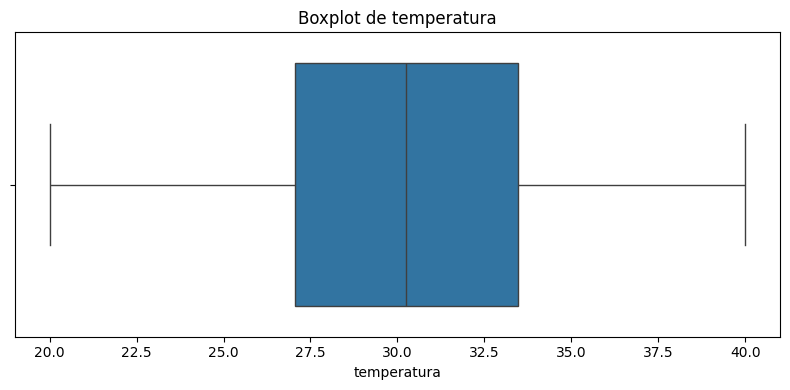

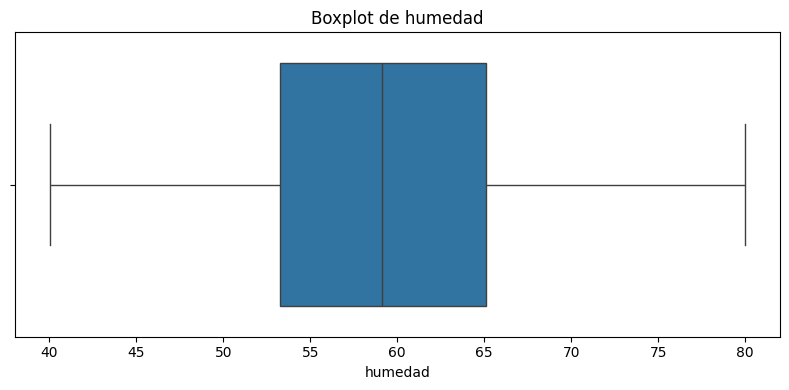

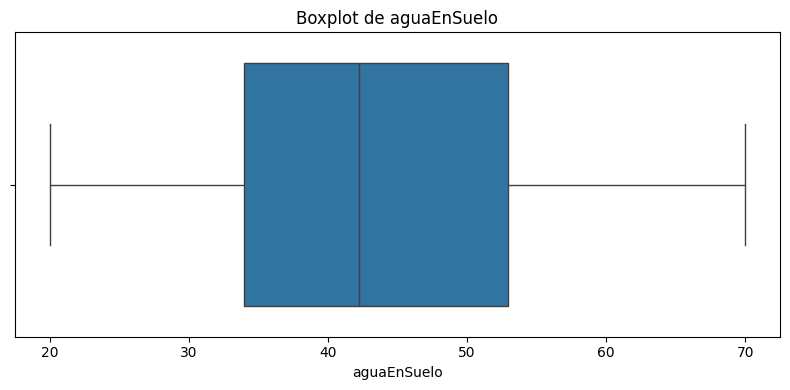

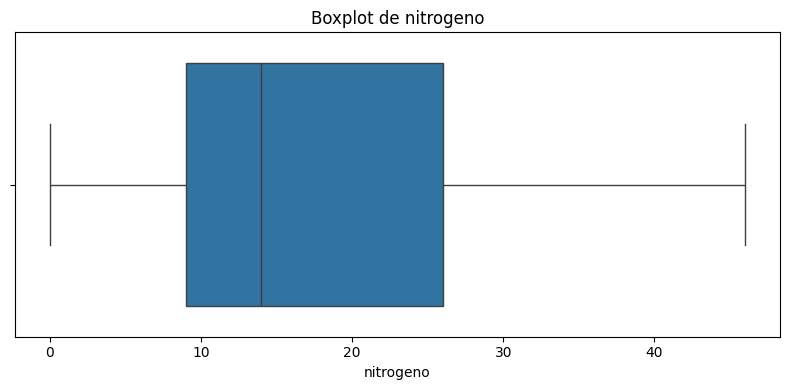

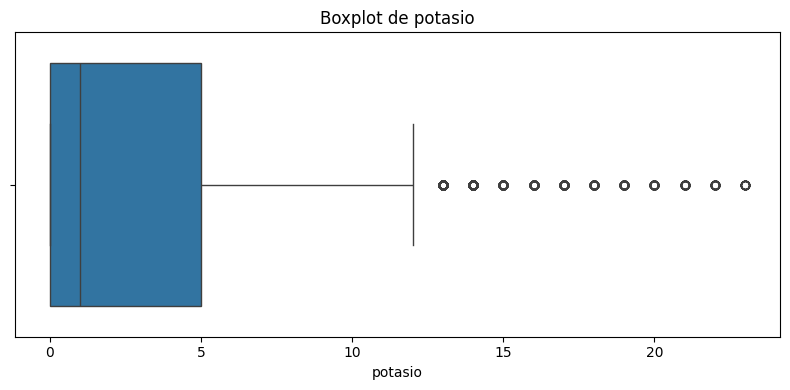

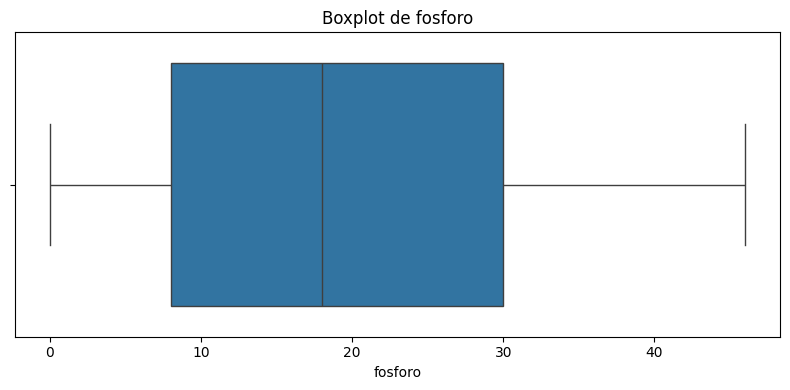

In [299]:
for col in df_cultivos.select_dtypes(include=['number']).columns:
    print(f"\nEstadísticas para {col}:")
    print(df_cultivos[col].describe())

    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_cultivos[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()

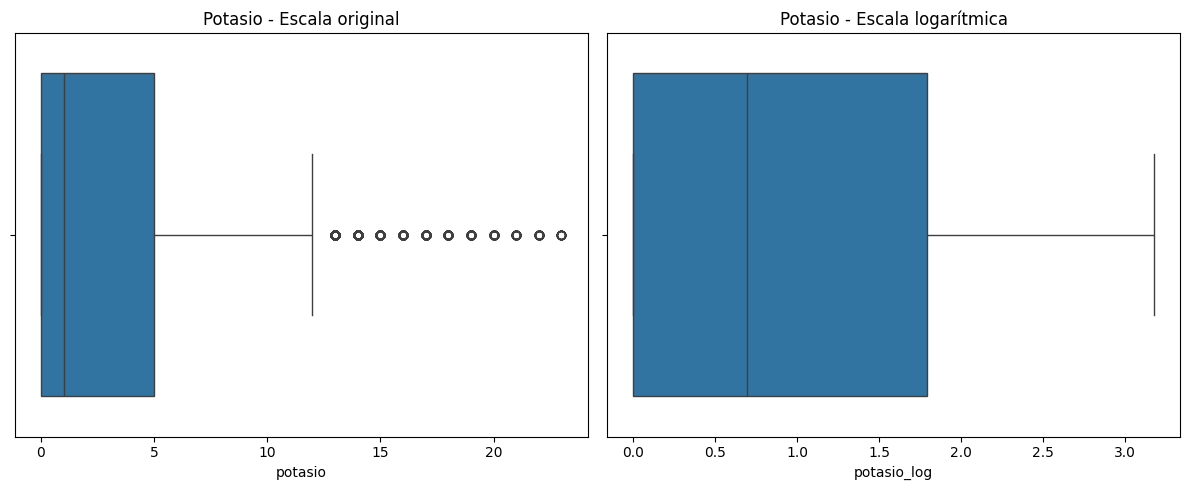

In [300]:
df_cultivos['potasio_log'] = np.log1p(df_cultivos['potasio'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_cultivos['potasio'])
plt.title('Potasio - Escala original')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cultivos['potasio_log'])
plt.title('Potasio - Escala logarítmica')

plt.tight_layout()

```python
def remove_outliers_iqr(df, column, factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_sin_outliers = remove_outliers_iqr(df_cultivos, 'potasio')
print(f"Filas originales: {len(df_cultivos)}, Filas después de eliminar outliers: {len(df_sin_outliers)}")

for col in df_sin_outliers.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_sin_outliers[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
```

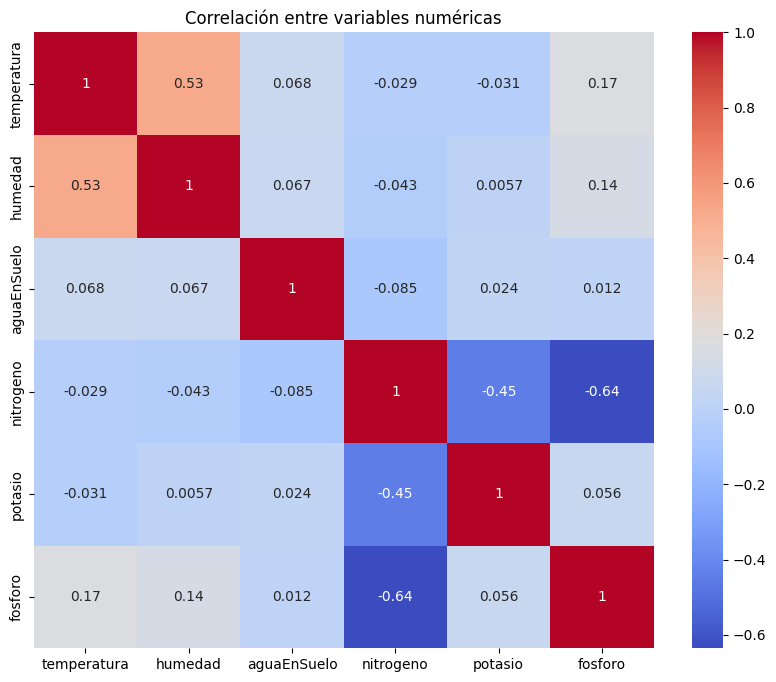

In [301]:
plt.figure(figsize=(10, 8))
corr = df_cultivos[columnas_numericas].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas')
plt.savefig('correlaciones.png')

In [302]:
for col in columnas_categoricas:
    le = LabelEncoder()
    df_cultivos[f"{col}_encoded"] = le.fit_transform(df_cultivos[col])

# Obtener nombres de columnas codificadas
columnas_encoded = [f"{col}_encoded" for col in columnas_categoricas]

In [303]:
columnas_para_normalizar = columnas_numericas + ['potasio_log']
columnas_encoded = [f"{col}_encoded" for col in columnas_categoricas]

scaler = MinMaxScaler()
df_num_normalizado = pd.DataFrame(
   scaler.fit_transform(df_cultivos[columnas_para_normalizar]),
   columns=[f"{col}_norm" for col in columnas_para_normalizar],
   index=df_cultivos.index
)

df_normalizado = pd.concat([df_num_normalizado, df_cultivos[columnas_encoded]], axis=1)

In [304]:
pca = PCA(n_components=df_normalizado.shape[1])
pca_features = pca.fit_transform(df_normalizado)

pc_cols = [f'PC{i+1}' for i in range(pca_features.shape[1])]

pca_df = pd.DataFrame(
    data=pca_features,
    columns=pc_cols
)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

Número de componentes para explicar 95% de varianza: 3


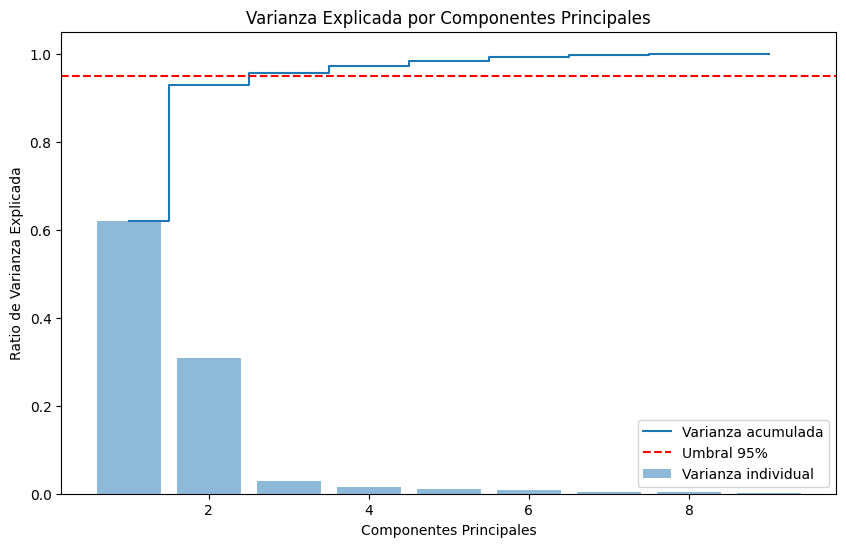

In [305]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.5, label='Varianza individual')
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', label='Varianza acumulada')
plt.axhline(y=0.95, color='r', linestyle='--', label='Umbral 95%')
plt.xlabel('Componentes Principales')
plt.ylabel('Ratio de Varianza Explicada')
plt.legend()
plt.title('Varianza Explicada por Componentes Principales')

n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Número de componentes para explicar 95% de varianza: {n_components_95}")

In [ ]:
pca_df['cultivo'] = df_cultivos['tipo_cultivo']

plt.figure(figsize=(10, 8))
cultivos = pca_df['cultivo'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(cultivos)))

for cultivo, color in zip(cultivos, colors):
    mask = pca_df['cultivo'] == cultivo
    plt.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC2'], 
                color=color, alpha=0.7, label=cultivo)

plt.xlabel(f'PC1 ({explained_variance[0]:.2%})')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%})')
plt.title('PCA - Proyección 2D')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


if pca_features.shape[1] >= 3:
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    for cultivo, color in zip(cultivos, colors):
        mask = pca_df['cultivo'] == cultivo
        ax.scatter(pca_df.loc[mask, 'PC1'], pca_df.loc[mask, 'PC2'], 
                  pca_df.loc[mask, 'PC3'], color=color, alpha=0.7, label=cultivo)
    
    ax.set_xlabel(f'PC1 ({explained_variance[0]:.2%})')
    ax.set_ylabel(f'PC2 ({explained_variance[1]:.2%})')
    ax.set_zlabel(f'PC3 ({explained_variance[2]:.2%})')
    ax.set_title('PCA - Proyección 3D')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

KeyError: 'tipo_cultivo'

In [ ]:
# Gráfico de codo para eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'o-', linewidth=2)
plt.title('Criterio del Codo')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.grid(True)